<img src="pokecluster.jpg",width=700,hight=700>

In [30]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.figsize'] = (12, 6)
pokedados=pd.read_csv("Pokemon.csv")
pd.options.mode.chained_assignment = None

## Construindo o Cluster 
#### Para exemplificar o que é um Cluster, construiremos um baseado nos estatus de Attack e Defense dos pokemons.
#### Existem vários metodos de construir um Cluster, o método utilizado nesse projeto será o K-Means, que consiste em criar um plano para cada variável fazendo com que cada objeto seja um ponto no espaço, ou seja se um pokemon tem 100 de Attack e 55 de Defense, o pokemon terá cordenadas (x=100,y=55).
#### Após isso serão colocados no gráfico 2 pontos(Pois nós só queremos 2 clusters) que chamaremos de centróides, com cordenadas x e y aleatórias. Em seguida séra calculada a distancia de cada ponto até essas duas centróides, a média dessas distancias servirão para dar origem a 2 novas centroides, que estarão mais proximas dos pontos com caracteriscas comuns.
#### Esse processo será feito varias vezes até que as centroides parem de mudar de lugar, assim os pontos mais proximos da centróide 1 estarão dentro do cluster 1, assim como os pontos mais próximos da centróide 2 estarão dentro do clueter 2.

58.1587301587 55.4897959184
104.604456825 96.3871866295


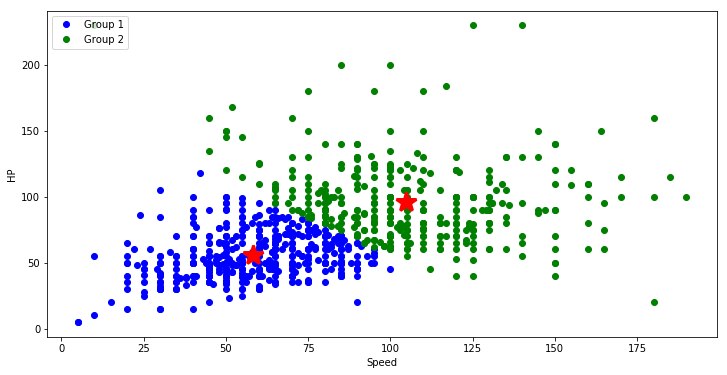

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Group
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Group 2
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Group 2
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Group 1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Group 1
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Group 2
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Group 2
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,Group 1
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,Group 1
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,Group 1
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,Group 2


In [46]:
def ClusterKmeansEx(dataframe):     
    f1 = dataframe['Attack'].values
    f2 = dataframe['Defense'].values
    X=np.array(list(zip(f1,f2))).reshape(len(f1),2)
    kmeans = KMeans(n_clusters=2).fit(X)
    x= kmeans.fit_predict(X)
    for i,j in enumerate(dataframe.index):
        dataframe.loc[j,"Group"]=""
        if x[i] == 0:
            dataframe.loc[j,"Group"]="Group 1"
        if x[i] == 1:
            dataframe.loc[j,"Group"]="Group 2"
        
    return dataframe

            
f1 = pokedados['Attack'].values
f2 = pokedados['Defense'].values
X=np.array(list(zip(f1,f2))).reshape(len(f1),2)
x= kmeans.fit_predict
kmeans = KMeans(n_clusters=2).fit(X)

plt.figure()
h1,=plt.plot(f1[kmeans.labels_==0],f2[kmeans.labels_==0],'bo')
plt.plot(np.mean(f1[kmeans.labels_==0]),np.mean(f2[kmeans.labels_==0]),'r*',markersize=20,mew=3)
# print centroid 1
print(np.mean(f1[kmeans.labels_==0]),np.mean(f2[kmeans.labels_==0]))
h2,=plt.plot(f1[kmeans.labels_==1],f2[kmeans.labels_==1],'go')
plt.plot(np.mean(f1[kmeans.labels_==1]),np.mean(f2[kmeans.labels_==1]),'r*',markersize=20,mew=3)
# print centroid 2
print(np.mean(f1[kmeans.labels_==1]),np.mean(f2[kmeans.labels_==1]))
plt.ylabel('Attack')
plt.xlabel('Defense')

plt.legend([h1,h2],['Group 1','Group 2'], loc='upper left')
plt.show()

ClusterKmeansEx(pokedados).head(10)

### Resultados:
#### Após de executado podemos perceber que o código separou os pokemons em 2 grupos, os com Attack e Deffense altos,e os com esses mesmo atributos baixos
<img src="ex.jpg",width=700,hight=700>

In [23]:
def SetDataFrameType(dataframeN,type1,type2):                   #Retorna um DataFrame com os tipos desejados
    index=[]
    dataframe=dataframeN.fillna("None")
    for i in range(len(dataframe)):
        if type2=="All":
            if dataframe["Type 1"][i]==type1 or dataframe["Type 2"][i]==type1:
                index.append(i)
        if type2=="None":
            if dataframe["Type 1"][i]==type1 and dataframe["Type 2"][i]=="None":
                index.append(i)      
        else:
            if dataframe["Type 1"][i]==type1 and dataframe["Type 2"][i]==type2 or dataframe["Type 1"][i]==type2 and dataframe["Type 2"][i]==type1:
                index.append(i)
    DF=pd.DataFrame()
    DF=dataframe.loc[index,:]
    return DF

def SetDataFrameLegendary(dataframe):                           #Retorna um DataFrame somente com os Pokemons lendarios
    index=[]
    for i in dataframe.index:
        if dataframe["Legendary"][i]==True:
            index.append(i)
    DF=pd.DataFrame()
    DF=dataframe.loc[index,:]
    
    return DF

def Generation(dataframe,gen):                                  #Retorna um DataFrame com os pokemons da geracao escolhida
    DF=dataframe.loc[(dataframe.Generation == gen)]
    
    return DF
    
def ClusterKmeans(dataframe):                                   #Retorna um DataFrame com os Pokemos classificaodos em 4 grupos
    f1 = dataframe['HP'].values
    f2 = dataframe['Attack'].values
    f3 = dataframe['Sp. Atk'].values
    f4 = dataframe['Defense'].values
    f5 = dataframe['Sp. Def'].values
    f6 = dataframe['Speed'].values
    X=np.array(list(zip(f1,f2,f3,f4,f5,f6))).reshape(len(f1),6)
    kmeans = KMeans(n_clusters=4).fit(X)
    x= kmeans.fit_predict(X)
    for i,j in enumerate(dataframe.index):
        dataframe.loc[j,"Group"]=""
        if x[i] == 0:
            dataframe.loc[j,"Group"]="Group 1"
        if x[i] == 1:
            dataframe.loc[j,"Group"]="Group 2"
        if x[i] == 2:
            dataframe.loc[j,"Group"]="Group 3"
        if x[i] == 3:
            dataframe.loc[j,"Group"]="Group 4"
    
    return dataframe,X    

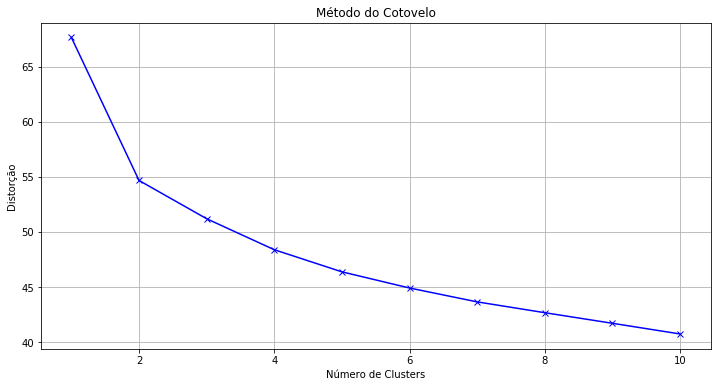

In [49]:
distortions = []
K = range(1,11)
X=(ClusterKmeans(pokedados)[1])
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])


plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Distorção')
plt.grid(True)
plt.title('Método do Cotovelo')
plt.show()
x=ClusterKmeans(pokedados)[0]

In [51]:
Generation(x,1).sort("Group").head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Group
82,76,Golem,Rock,Ground,495,80,120,130,55,65,45,1,False,Group 1
81,75,Graveler,Rock,Ground,390,55,95,115,45,45,35,1,False,Group 1
86,80,Slowbro,Water,Psychic,490,95,75,110,100,80,30,1,False,Group 1
87,80,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False,Group 1
33,28,Sandslash,Ground,NaN,450,75,100,110,45,55,65,1,False,Group 1
98,91,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False,Group 1
103,95,Onix,Rock,Ground,385,35,45,160,30,45,70,1,False,Group 1
107,99,Kingler,Water,NaN,475,55,130,115,50,50,75,1,False,Group 1
113,105,Marowak,Ground,NaN,425,60,80,110,50,80,45,1,False,Group 1
118,110,Weezing,Poison,NaN,490,65,90,120,85,70,60,1,False,Group 1
